In [3]:
# pip install -r requirements.txt

Вначале импортируем основные библиотеки для работы с данными

In [4]:
import pandas as pd # Pandas = таблицы и данные
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # исключительно для визуализации графиков
import warnings

# Отключение варнингов - лишние предупреждения
warnings.filterwarnings("ignore")

# Настройка палитры seaborn для задания стиля графиков
sns.set_palette('cubehelix')

Дата сет представляет собой файл формата csv, сжатым в архив формата zip.

In [5]:
df = pd.read_csv("data_despair_139_v20241014.zip", compression="zip", sep=";")  # Прямо из zip

Для первичного анализа датасета отобразим несколько строк

In [226]:
display(df.sample(6)) # показываем первые 6 строк
pd.set_option('display.max_columns', None) # для показа всех колонок

,indicator_name,object_level,object_name,okato,oktmo,year,age,settlement_type,gender,reason_code,reason_name,indicator_value,indicator_unit
835301,Число умерших,Регион,Брянская область,15000000,15000000,2023,25-29 лет,U,F,295,"Падение, прыжок или сталкивание с высоты с нео...",0,Человек
867080,Число умерших,Регион,Республика Калмыкия,85000000,85000000,2023,40-44 лет,U,F,283,Преднамеренное самоотравление и воздействие ал...,0,Человек
661723,Число умерших,Регион,Томская область,69000000,69000000,2022,30-34 лет,R,F,287,Отравление и воздействие наркотиками и психоди...,0,Человек
235908,Число умерших,Регион,Севастополь,67000000,67000000,2020,10-14 лет,U,F,288,Отравление и воздействие алкоголем с неопредел...,0,Человек
168129,Число умерших,Регион,Республика Мордовия,89000000,89000000,2019,75-79 лет,T,M,290,"Повешение, удушение и удавление с неопределенн...",0,Человек
497908,Число умерших,Регион,Челябинская область,75000000,75000000,2021,45-49 лет,T,F,283,Преднамеренное самоотравление и воздействие ал...,0,Человек


In [7]:
df.shape # из чего состоит дф

(968720, 13)

Для дальнейшего анализа датасета уменьшим количество строк и уберем некоторые параметры. Исследует атрибуты `age`, `object_level`, `settlement_type`.

Отфильтрованный дата сет поместим в новую переменную `df_filtered`.

In [8]:
df_filtered = df

В возрасте есть категория "Всего". Для анализа мы не будем учитывать это значение. Кроме того, было принято решение взять следующую исследуемую группу: возраст от 10 до 84 лет включительно.

In [9]:
df["age"].value_counts()

age
до 1 года          48436
1-4 года           48436
5-9 лет            48436
10-14 лет          48436
15-19 лет          48436
20-24 года         48436
25-29 лет          48436
30-34 лет          48436
35-39 лет          48436
40-44 лет          48436
45-49 лет          48436
50-54 лет          48436
55-59 лет          48436
60-64 лет          48436
65-69 лет          48436
70-74 лет          48436
75-79 лет          48436
80-84 лет          48436
85 и  более лет    48436
Всего              48436
Name: count, dtype: int64

In [10]:
df_filtered = df_filtered[~df_filtered["age"].isin(['до 1 года', '1-4 года', '5-9 лет', '85 и  более лет', 'Всего'])]

Посмотрим атрибут `object_level`. Атрибут содержит три категории: регион, федеральный округ и страна. Дальшейнее анализ будет проводиться по наиболее маленькому уровню объектов, то есть только по регионам.

In [11]:
df["object_level"].value_counts()

object_level
Регион               875840
Федеральный округ     82560
Страна                10320
Name: count, dtype: int64

In [12]:
df_filtered = df_filtered[df_filtered["object_level"] == "Регион"]

Атрибут `settlement_type`. Атрибут содержит три категории: U (городская местность), R (сельская местность) и T (общее). В дальнейшем анализе не будем брать во внимание категорию T.

In [13]:
df["settlement_type"].value_counts()

settlement_type
U    323360
T    323360
R    322000
Name: count, dtype: int64

In [14]:
df_filtered = df_filtered[df_filtered["settlement_type"] != "T"]

In [15]:
df_filtered.shape

(437580, 13)

Еще раз кратко отфильтруем датасет

In [16]:
df_filtered = df[
    (~df["age"].isin(["до 1 года", "1-4 года", "5-9 лет", "85 и  более лет", "Всего"])) &
    (df["object_level"] == "Регион") &
    (df["settlement_type"] != "T")  
]

In [17]:
df_filtered.shape

(437580, 13)

Выведем несколько случайных строк из отфильтрованного датасета

In [18]:
display(df_filtered.sample(5)) 
pd.set_option('display.max_columns', None) # для показа всех колонок

,indicator_name,object_level,object_name,okato,oktmo,year,age,settlement_type,gender,reason_code,reason_name,indicator_value,indicator_unit
440236,Число умерших,Регион,Ямало-Ненецкий автономный округ,71140000,71900000,2021,15-19 лет,R,M,293,"Воздействие дымом, огнем и пламенем с неопреде...",0,Человек
260815,Число умерших,Регион,Белгородская область,14000000,14000000,2020,25-29 лет,R,M,290,"Повешение, удушение и удавление с неопределенн...",1,Человек
646671,Число умерших,Регион,Ленинградская область,41000000,41000000,2022,25-29 лет,R,F,297,Уточненные и неуточненные повреждения с неопре...,0,Человек
87974,Число умерших,Регион,Саратовская область,63000000,63000000,2019,35-39 лет,R,F,289,Прочие отравления с неопределенными намерениями,1,Человек
484262,Число умерших,Регион,Санкт-Петербург,40000000,40000000,2021,40-44 лет,U,M,289,Прочие отравления с неопределенными намерениями,1,Человек


Для дальнейшего анализа в проекте не понадобятся столбцы `indicator_name`, `object_level`, `okato`, `oktmo`, `indicator_unit`.

In [19]:
del df_filtered['okato']
del df_filtered['oktmo']
del df_filtered['indicator_name']
del df_filtered['indicator_unit']
del df_filtered['object_level']

In [20]:
display(df_filtered.sample(5)) 
pd.set_option('display.max_columns', None) # для показа всех колонок

,object_name,year,age,settlement_type,gender,reason_code,reason_name,indicator_value
122258,Владимирская область,2019,55-59 лет,U,M,281,Случайное отравление и воздействие наркотиками...,0
523755,Республика Дагестан,2021,60-64 лет,U,F,291,Погружение в воду и утопление с неопределенным...,0
315881,Республика Алтай,2020,50-54 лет,U,F,293,"Воздействие дымом, огнем и пламенем с неопреде...",0
92728,Орловская область,2019,40-44 лет,R,F,291,Погружение в воду и утопление с неопределенным...,1
839684,Республика Северная Осетия — Алания,2023,25-29 лет,R,F,292,Повреждение в результате выстрела из огнестрел...,0


После удаления некоторых столбцов в отфильтрованной таблице остались следующие атрибуты:

|Атрибут|Описание|
|-|-|
|`object_name`|наименование региона|
|`year`|год|
|`age`|возрастная категория|
|`settlement_type`|тип местности (R - сельская, U - городская)|
|`gender`|пол|
|`reason_code`|краткая номенклатура причины смерти|
|`reason_name`|причина смерти|
|`indicator_value`|количество смертей|

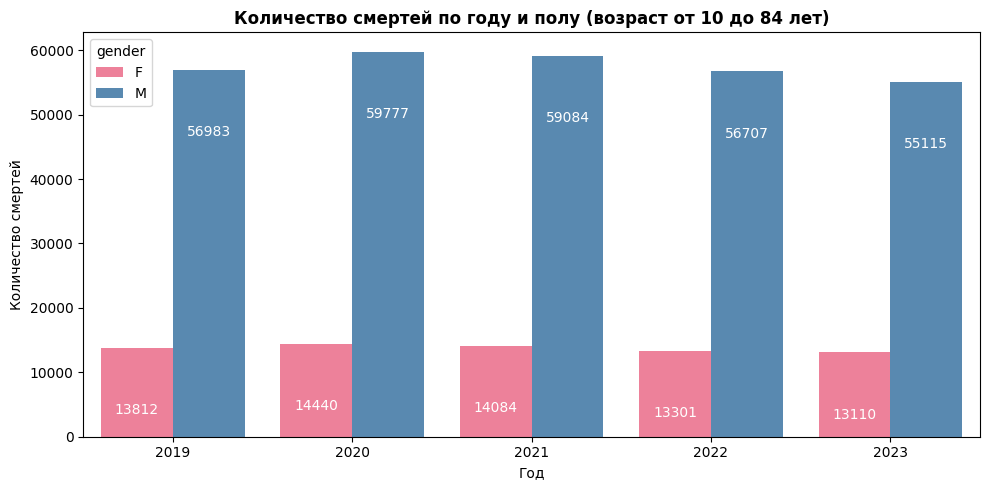

In [ ]:
# Группировка данных по возрасту и полу
result_1 = df_filtered.groupby(['year', 'gender'])['indicator_value'].sum().reset_index()

plt.figure(figsize=(10, 5))
custom_colors = {'M': '#4B8BBE', 'F': '#FF6F91'} # словарь цветов для графика
ax = sns.barplot(x='year', y='indicator_value', hue='gender', data=result_1, palette=custom_colors)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=-50, color='white')
    
plt.xlabel('Год')
plt.ylabel('Количество смертей')
plt.title('Количество смертей по году и полу (возраст от 10 до 84 лет)', fontweight='bold')
plt.xticks()
plt.tight_layout()
plt.show()

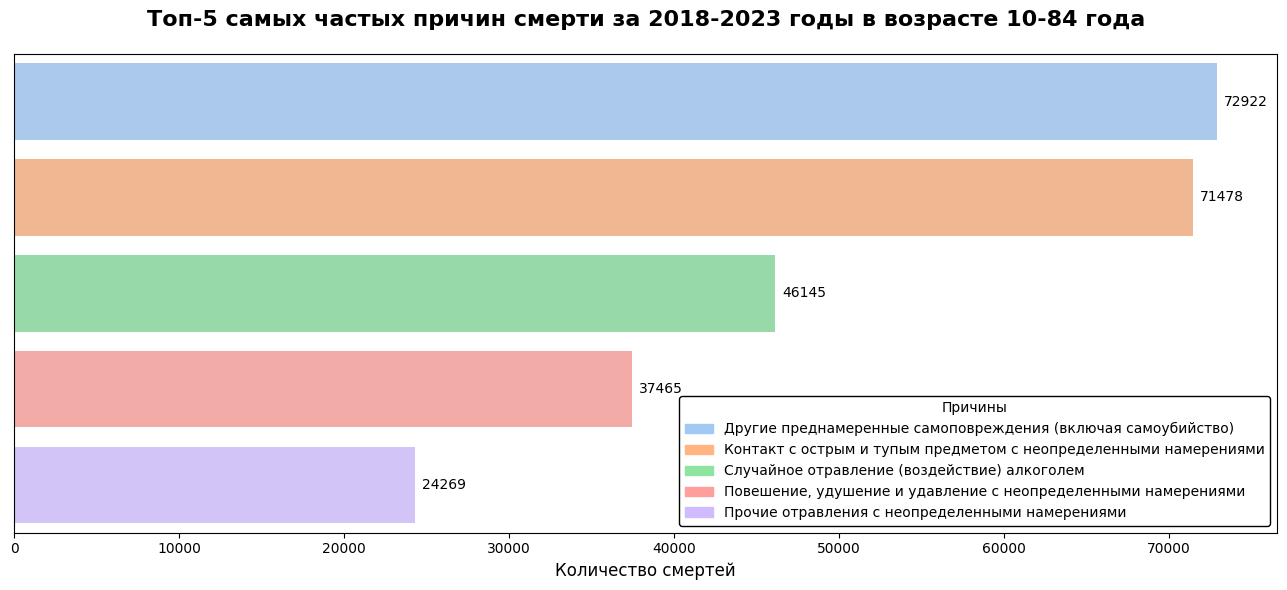

In [81]:
result_2 = df_filtered.groupby(['reason_name'])['indicator_value'].sum().reset_index()\
             .sort_values('indicator_value', ascending=False).head(5)

plt.figure(figsize=(13, 6))

# Создание кастомной палитры для столбцов
custom_palette = sns.color_palette("pastel", len(result_2))

# Построение графика с кастомной палитрой
ax = sns.barplot(x='indicator_value', y='reason_name', 
                 data=result_2, palette=custom_palette, orient='h')

# Добавление значений на столбцы
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5, color='black')

plt.xlabel('Количество смертей', fontsize=12) # label на ось X
plt.ylabel('')  # label на ось Y - отсутствует, поскольку в легенде
plt.title('Топ-5 самых частых причин смерти за 2018-2023 годы в возрасте 10-84 года', fontsize=16, pad=20, fontweight='bold')

# Создание легенды внутри графика
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_palette]
legend_labels = result_2['reason_name'].tolist()

# Настройки легенды на графике
legend = ax.legend(handles, legend_labels,
                 title='Причины', # Заголовок
                 loc='lower right',
                 frameon=True,  # Наличие рамки
                 framealpha=1,  # Непрозрачная рамка
                 edgecolor='black',  # Цвет обводки
                 fancybox=True,  # Скругленные углы
                 ncol=1,  # Одна колонка - каждая причина с новой строки
                 bbox_to_anchor=(1.0, 0.0))  # Правый нижний угол

plt.yticks([])  # Убираем метки на оси Y
plt.tight_layout()
plt.show()

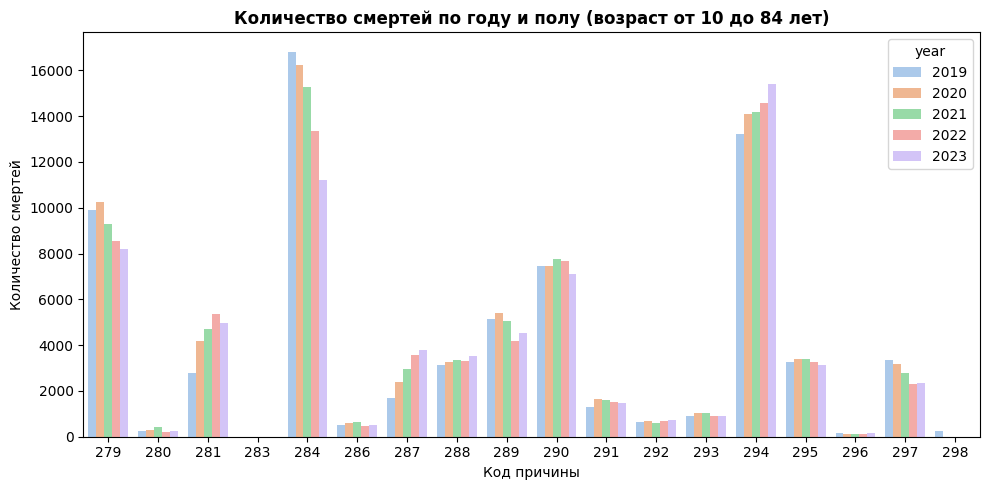

In [239]:
#
result_3 = df_filtered.groupby(['reason_code', 'year'])['indicator_value'].sum().reset_index()

# Получим соответствия reason_code → reason_name
reason_map = df_filtered[['reason_code', 'reason_name']].drop_duplicates().sort_values('reason_code')

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='reason_code', y='indicator_value', hue='year', data=result_3, palette="pastel")


plt.xlabel('Код причины')
plt.ylabel('Количество смертей')
plt.title('Количество смертей по году и полу (возраст от 10 до 84 лет)', fontweight='bold')



plt.xticks()
plt.tight_layout()
plt.show()

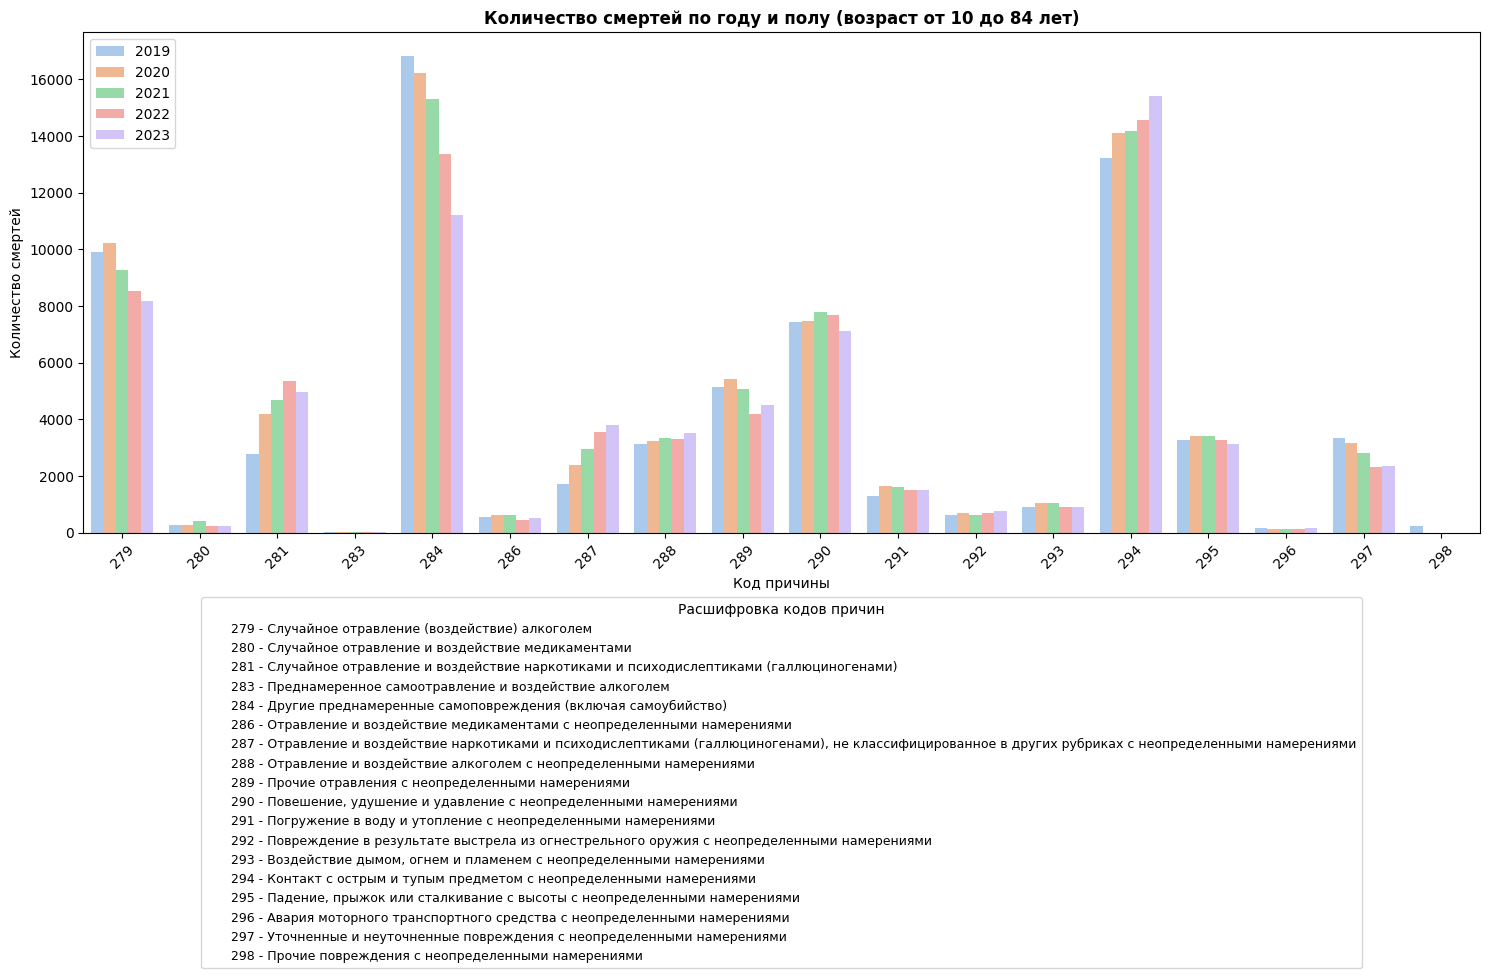

In [209]:
from matplotlib.patches import Patch

# Создаем словарь для расшифровки кодов причин
code_to_name = df_filtered[['reason_code', 'reason_name']].drop_duplicates()\
               .set_index('reason_code')['reason_name'].to_dict()

result_3 = df_filtered.groupby(['reason_code', 'year'])['indicator_value'].sum().reset_index()

plt.figure(figsize=(15, 12))
ax = sns.barplot(x='reason_code', y='indicator_value', hue='year', 
                data=result_3, palette="pastel")

# Первая легенда (года) остается автоматически созданной
first_legend = ax.legend(
    loc='upper left'
) 

# Создаем элементы для второй легенды (без цветовых индикаторов)
legend_elements = [
    Patch(facecolor='none', edgecolor='none', label=f'{code} - {name}') 
    for code, name in code_to_name.items()
]

# Добавляем вторую легенду
second_legend = ax.legend(
    handles=legend_elements,
    title='Расшифровка кодов причин',
    #loc='upper right',
    #bbox_to_anchor=(1.05, 0.9),
    loc='center',
    bbox_to_anchor=(0.5, -0.5),
    frameon=True,
    handletextpad=0,  # Убираем пространство для несуществующего цветного индикатора
    fontsize=9
)

# Возвращаем первую легенду обратно на график
ax.add_artist(first_legend)

plt.xlabel('Код причины')
plt.ylabel('Количество смертей')
plt.title('Количество смертей по году и полу (возраст от 10 до 84 лет)', fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

**Вывод:**  
Меньше всего смертей произошло по причинам 283, 296, 298. Детальнее рассмотрим значения.

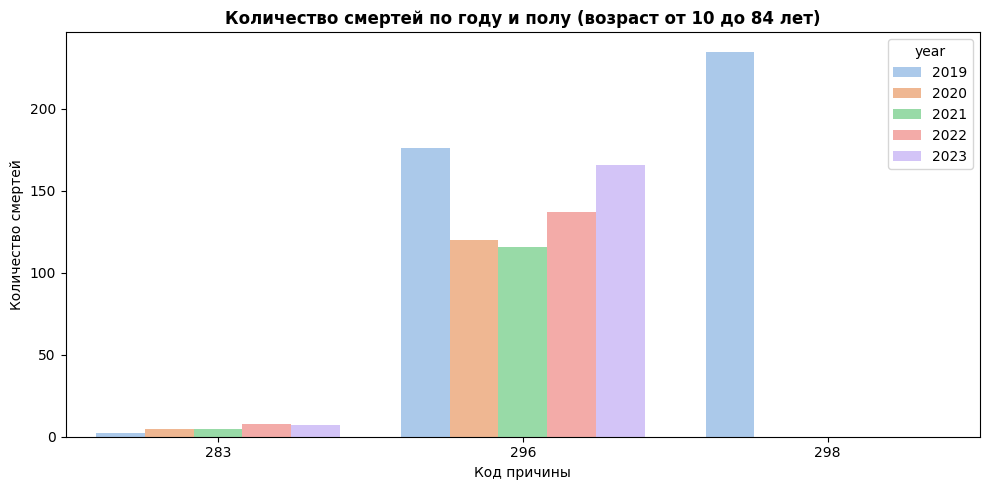

In [215]:
selected_codes = [283, 296, 298]
result_4 = df_filtered[df_filtered['reason_code'].isin(selected_codes)]

result_4 = result_4.groupby(['reason_code', 'year'])['indicator_value'].sum().reset_index()

# Получим соответствия reason_code → reason_name
reason_map = df_filtered[['reason_code', 'reason_name']].drop_duplicates().sort_values('reason_code')

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='reason_code', y='indicator_value', hue='year', data=result_4, palette="pastel")


plt.xlabel('Код причины')
plt.ylabel('Количество смертей')
plt.title('Количество смертей по году и полу (возраст от 10 до 84 лет)', fontweight='bold')



plt.xticks()
plt.tight_layout()
plt.show()

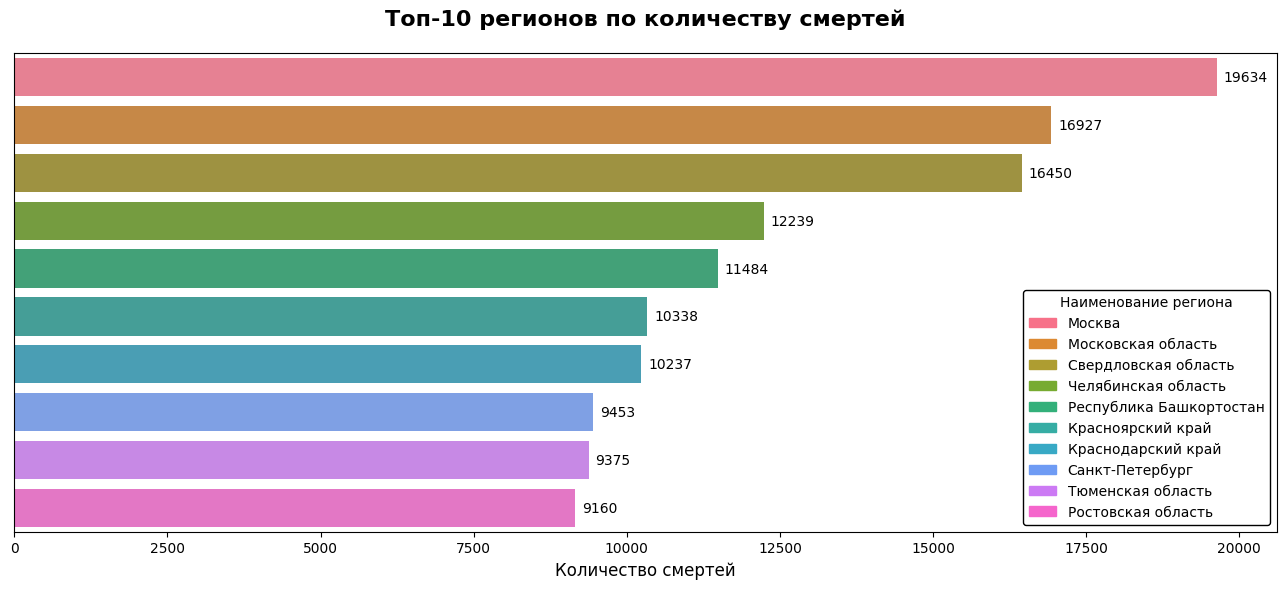

In [237]:
result_5 = df_filtered.groupby(['object_name'])['indicator_value'].sum().reset_index()\
             .sort_values('indicator_value', ascending=False).head(10)

plt.figure(figsize=(13, 6))

# Создание кастомной палитры для столбцов
custom_palette = sns.color_palette("husl", len(result_5))

# Построение графика с кастомной палитрой
ax = sns.barplot(x='indicator_value', y='object_name', 
                 data=result_5, palette=custom_palette, orient='h')

# Добавление значений на столбцы
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5, color='black')

plt.xlabel('Количество смертей', fontsize=12) # label на ось X
plt.ylabel('')  # label на ось Y - отсутствует, поскольку в легенде
plt.title('Топ-10 регионов по количеству смертей', fontsize=16, pad=20, fontweight='bold')

# Создание легенды внутри графика
handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_palette]
legend_labels = result_5['object_name'].tolist()

# Настройки легенды на графике
legend = ax.legend(handles, legend_labels,
                 title='Наименование региона', # Заголовок
                 loc='lower right',
                 frameon=True,  # Наличие рамки
                 framealpha=1,  # Непрозрачная рамка
                 edgecolor='black',  # Цвет обводки
                 fancybox=True,  # Скругленные углы
                 ncol=1,  # Одна колонка - каждая причина с новой строки
                 bbox_to_anchor=(1.0, 0.0))  # Правый нижний угол

plt.yticks([])  # Убираем метки на оси Y
plt.tight_layout()
plt.show()

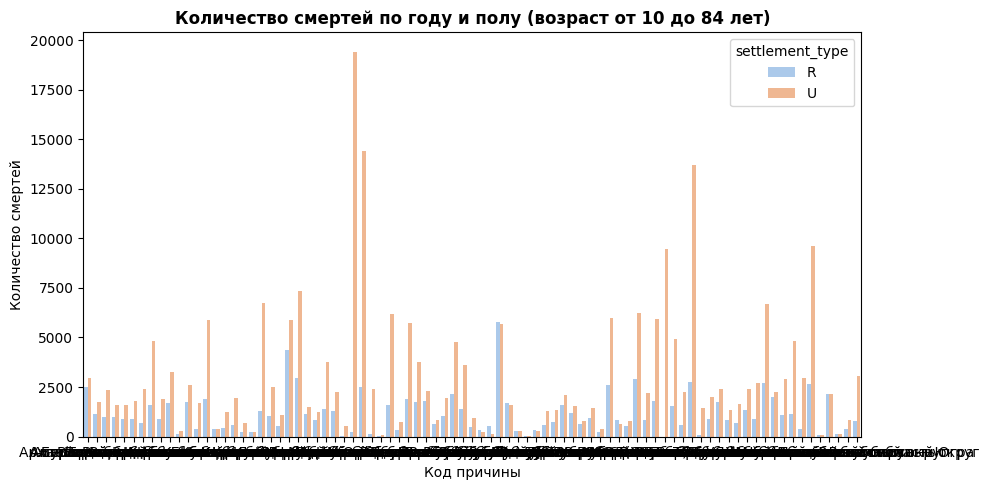

In [242]:
#
result_6 = df_filtered.groupby(['object_name', 'settlement_type'])['indicator_value'].sum().reset_index()



plt.figure(figsize=(10, 5))
ax = sns.barplot(x='object_name', y='indicator_value', hue='settlement_type', data=result_6, palette="pastel")


plt.xlabel('Код причины')
plt.ylabel('Количество смертей')
plt.title('Количество смертей по году и полу (возраст от 10 до 84 лет)', fontweight='bold')



plt.xticks()
plt.tight_layout()
plt.show()

Возможно лучше сделать в виде таблицы: регион, смертность в селе и городе, значение отношения одного к другому. И мб чтобы все регионы разделить на два столбца, чтобы таблица была не слишком длинная.

In [28]:
df.info() # выводит всю информацию по дф (кол-во ненулевых значений и тип данных)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968720 entries, 0 to 968719
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   indicator_name   968720 non-null  object
 1   object_level     968720 non-null  object
 2   object_name      968720 non-null  object
 3   okato            968720 non-null  int64 
 4   oktmo            968720 non-null  int64 
 5   year             968720 non-null  int64 
 6   age              968720 non-null  object
 7   settlement_type  968720 non-null  object
 8   gender           968720 non-null  object
 9   reason_code      968720 non-null  int64 
 10  reason_name      968720 non-null  object
 11  indicator_value  968720 non-null  int64 
 12  indicator_unit   968720 non-null  object
dtypes: int64(5), object(8)
memory usage: 96.1+ MB


In [29]:
df["indicator_value"].value_counts() # считаем кол-во каждого из значений в статусе

indicator_value
0       714644
1        88831
2        38443
3        22505
4        15129
         ...  
940          1
3036         1
1052         1
1302         1
1209         1
Name: count, Length: 1208, dtype: int64

In [227]:
df_filtered.groupby(['reason_code'])['indicator_value'].sum().sort_values(ascending=False).tail(10)


reason_code
287    14391
297    13975
291     7555
293     4757
292     3342
286     2724
280     1399
296      715
298      235
283       27
Name: indicator_value, dtype: int64

In [31]:
df_filtered.groupby('gender')['indicator_value'].sum()


gender
F     68747
M    287666
Name: indicator_value, dtype: int64

In [32]:
df_filtered.groupby('age')['indicator_value'].sum()

age
10-14 лет      1946
15-19 лет      6937
20-24 года    11111
25-29 лет     17664
30-34 лет     34653
35-39 лет     44879
40-44 лет     44702
45-49 лет     37677
50-54 лет     30737
55-59 лет     32066
60-64 лет     31650
65-69 лет     23848
70-74 лет     16756
75-79 лет      9223
80-84 лет     12564
Name: indicator_value, dtype: int64

In [33]:
df_filtered[(df_filtered['year'] == 2022) & df_filtered['indicator_value']  > 0]

,object_name,year,age,settlement_type,gender,reason_code,reason_name,indicator_value
615435,Белгородская область,2022,10-14 лет,U,M,290,"Повешение, удушение и удавление с неопределенн...",1
615447,Белгородская область,2022,10-14 лет,U,F,284,Другие преднамеренные самоповреждения (включая...,1
615486,Белгородская область,2022,10-14 лет,R,F,290,"Повешение, удушение и удавление с неопределенн...",1
615550,Брянская область,2022,10-14 лет,U,F,286,Отравление и воздействие медикаментами с неопр...,1
615732,Воронежская область,2022,10-14 лет,U,M,279,Случайное отравление (воздействие) алкоголем,1
...,...,...,...,...,...,...,...,...
758273,Сахалинская область,2022,80-84 лет,R,M,294,Контакт с острым и тупым предметом с неопредел...,1
758285,Сахалинская область,2022,80-84 лет,R,F,289,Прочие отравления с неопределенными намерениями,1
758290,Сахалинская область,2022,80-84 лет,R,F,294,Контакт с острым и тупым предметом с неопредел...,1
758332,Еврейская автономная область,2022,80-84 лет,U,M,284,Другие преднамеренные самоповреждения (включая...,1


In [34]:
df_filtered.groupby('year')['indicator_value'].sum()

year
2019    70795
2020    74217
2021    73168
2022    70008
2023    68225
Name: indicator_value, dtype: int64

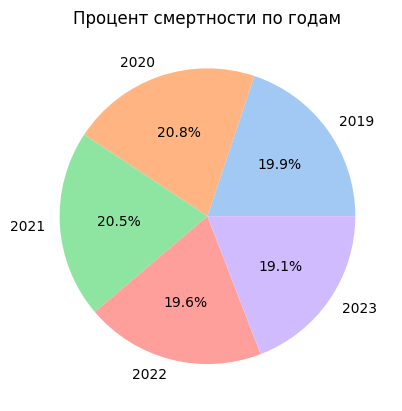

In [35]:
sns.set_palette('pastel')
year_death = df_filtered.groupby('year')['indicator_value'].sum()
plt.pie(year_death, labels=year_death.index, autopct='%1.1f%%')
plt.title('Процент смертности по годам')
plt.show()

In [36]:
# Группировка по году и полу и подсчет суммы смертей
result = df_filtered.groupby(['year', 'gender'])['indicator_value'].sum().reset_index()

# Отображение результата
display(result)

,year,gender,indicator_value
0,2019,F,13812
1,2019,M,56983
2,2020,F,14440
3,2020,M,59777
4,2021,F,14084
5,2021,M,59084
6,2022,F,13301
7,2022,M,56707
8,2023,F,13110
9,2023,M,55115


In [37]:
# Группировка по возрасту и полу и подсчет суммы смертей
result = df_filtered.groupby(['age', 'gender'])['indicator_value'].sum().reset_index()

# Отображение результата
display(result)

,age,gender,indicator_value
0,10-14 лет,F,815
1,10-14 лет,M,1131
2,15-19 лет,F,1939
3,15-19 лет,M,4998
4,20-24 года,F,2042
5,20-24 года,M,9069
6,25-29 лет,F,2465
7,25-29 лет,M,15199
8,30-34 лет,F,4503
9,30-34 лет,M,30150


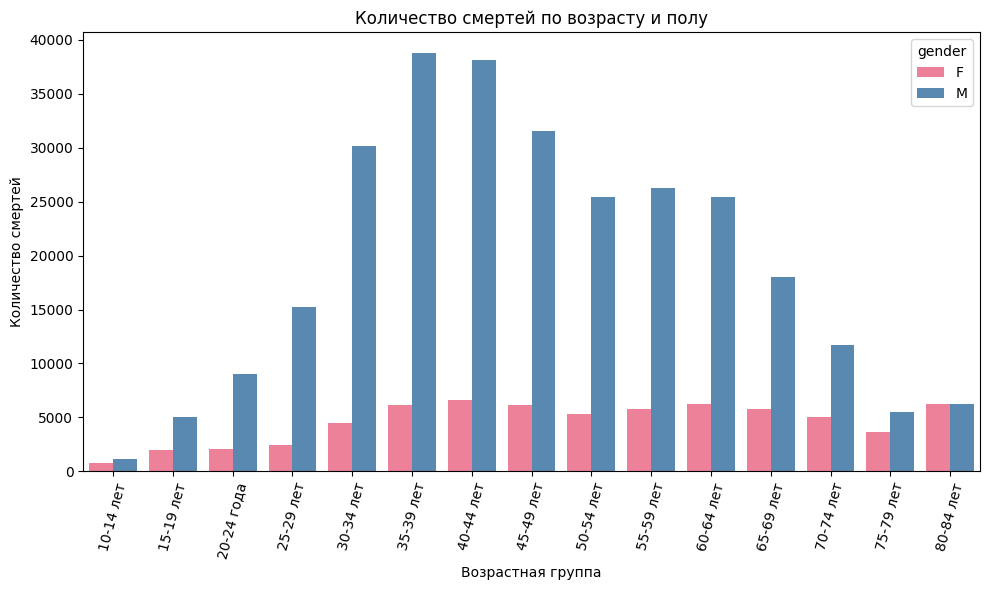

In [38]:

# Группируем данные по возрасту и полу
result = df_filtered.groupby(['age', 'gender'])['indicator_value'].sum().reset_index()

# Построение графика
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='indicator_value', hue='gender', data=result, palette=custom_colors)

plt.xlabel('Возрастная группа')
plt.ylabel('Количество смертей')
plt.title('Количество смертей по возрасту и полу')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [39]:
df_filtered.groupby(['reason_name'])['indicator_value'].sum().reset_index().sort_values('indicator_value', ascending=False).head(5)


,reason_name,indicator_value
2,Другие преднамеренные самоповреждения (включая...,72922
3,Контакт с острым и тупым предметом с неопредел...,71478
15,Случайное отравление (воздействие) алкоголем,46145
8,"Повешение, удушение и удавление с неопределенн...",37465
13,Прочие отравления с неопределенными намерениями,24269
